In [1]:
import matplotlib as mlp
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
import os

In [259]:
sns.set()


In [3]:
#sigsa = pd.read_excel("../../../../Outcome Measurement Data/HIV/SIGSA - Solicitud 0593-2018/Solicitud 0593-2018 SIGSA SIDA 1.2 años 2014 al 2017.xlsx", 
#           skiprows=4, encoding="latin-1")
# sigsa.to_csv("../../../../Outcome Measurement Data/HIV/SIGSA - Solicitud 0593-2018/Solicitud 0593-2018 SIGSA SIDA 1.2 años 2014 al 2017.csv", index=False)
sigsa = pd.read_csv("../../../../Outcome Measurement Data/HIV/SIGSA - Solicitud 0593-2018/Solicitud 0593-2018 SIGSA SIDA 1.2 años 2014 al 2017.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#sigsa.columns
pd.options.display.max_columns=1000
pd.options.display.width = 200

In [5]:
def countCods(x):
    return len(x.unique())

In [6]:
sigsa.columns = ["Año", "Mes", "Área de Salud", "Distrito de Salud", "Servicio de Salud", "Tipo Servicio", "Municipio",
"Fecha", "Codigo de Persona", "Lugar de Nacimiento-Depto", "Lugar de Nacimiento-Muni", 
"Fecha de Nacimiento-Day", "Fecha de Nacimiento-Month", "Fecha de Nacimiento-Year", 
"Nacionalidad", "Sexo", "Residencia Actual-Depto", "Residencia Actual-Muni", "Orientación Sexual",
"Pueblo", "Comunidad Liguistica", "Condición de Riesgo", "Motivo de Orientación", "Embarazo y Puerperio",
"Orientación Pre Prueba", "Se hizo la Prueba", "VIH-Prueba de Tamizaje", "VIH-Resultado-t", "VIH-Prueba Confirmatoria",
"VIH-Resultado-c", "Sif-Prueba Treponémica", "Sif-Resultado", "Sif-Prueba no Treponémica", "Sif-Resultado de la Dilución",
"HepB-Prueba de Tamizaje", "HepB-Resultado", "Entrega de Resultados con Orientacion Post Prueba", "Referencia"]

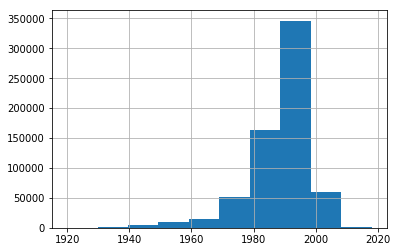

In [11]:
sigsa["Fecha de Nacimiento-Year"].hist()

In [8]:
sigsa["Condición de Riesgo"].value_counts()

Mujer en Riesgo                         460591
Hombre en Riesgo                         72952
Joven en Riesgo Social                   62127
-                                        25398
Trabajador Sexual                        19850
Privado de Libertad                       4624
Niño/a en contexto de vulnerabilidad      4108
Uniformado                                2892
Migrante                                  1080
Name: Condición de Riesgo, dtype: int64

In [12]:
sigsa["Orientación Sexual"].value_counts()

Heterosexual    613244
-                29492
Homosexual        5644
Bisexual          3052
Trans             2190
Name: Orientación Sexual, dtype: int64

In [6]:
sigsa["Residencia Actual-Depto"].unique()

array(['ESCUINTLA', 'SANTA ROSA', 'GUATEMALA', 'QUETZALTENANGO',
       'TOTONICAPAN', 'SAN MARCOS', 'SUCHITEPEQUEZ', 'HUEHUETENANGO',
       'SOLOLA', 'QUICHE', 'RETALHULEU', nan, 'ZACAPA', 'EL PROGRESO',
       'ALTA VERAPAZ', 'SACATEPEQUEZ', 'CHIQUIMULA', '(OTROS)', 'IZABAL',
       'CHIMALTENANGO', 'JUTIAPA', 'BAJA VERAPAZ', 'EL PETEN', 'JALAPA'],
      dtype=object)

In [16]:
sigsaDeptos = {
    'ESCUINTLA': 5, 
    'SANTA ROSA': 6, 
    'GUATEMALA': 1,
    'QUETZALTENANGO': 9,
    'TOTONICAPAN': 8, 
    'SAN MARCOS': 12, 
    'SUCHITEPEQUEZ': 10, 
    'HUEHUETENANGO': 13,
    'SOLOLA': 7, 
    'QUICHE': 14, 
    'RETALHULEU': 11, 
    'ZACAPA': 19, 
    'EL PROGRESO': 2,
    'ALTA VERAPAZ': 16, 
    'SACATEPEQUEZ': 3, 
    'CHIQUIMULA': 20, 
    '(OTROS)': 0, 
    'IZABAL': 18,
    'CHIMALTENANGO': 4, 
    'JUTIAPA': 22, 
    'BAJA VERAPAZ': 15, 
    'EL PETEN': 17, 
    'JALAPA': 21
}

In [17]:
dfs = []
dirdata = "../../../../Outcome Measurement Data/HIV/GTrends/"
for f in os.listdir(dirdata):
    if "2017" in f and "TS" not in f:
        dfs.append(pd.read_csv(dirdata + f, header = None, names = ["depto", "gtrend"], skiprows=3).assign(filename=f))

In [18]:
gtrends =  pd.concat(dfs)

In [19]:
gtrends.head()

,depto,gtrend,filename
0,Santa Rosa Department,100.0,GTrends-2017-01-SIDA.csv
1,Suchitepequez,90.0,GTrends-2017-01-SIDA.csv
2,Petén Department,81.0,GTrends-2017-01-SIDA.csv
3,Zacapa Department,70.0,GTrends-2017-01-SIDA.csv
4,Escuintla,68.0,GTrends-2017-01-SIDA.csv


In [20]:
gtrends["Año"] = gtrends.filename.map(lambda x: int(x.split("-")[1]))
gtrends["Mes_orig"] = gtrends.filename.map(lambda x: int(x.split("-")[2]))
gtrends["Term"] = gtrends.filename.map(lambda x: x.split("-")[3][0:-4])

In [21]:
gtrends.Term.value_counts()

SIDA    264
VIH     264
Name: Term, dtype: int64

In [22]:
gtDeptos = {
    'Santa Rosa Department': 6, 
    'Suchitepequez': 10,
    'Petén Department': 17,
    'Zacapa Department': 19, 
    'Escuintla': 5, 
    'Jalapa Department': 21,
    'Huehuetenango Department': 13, 
    'Quetzaltenango Department': 9,
    'Guatemala Department': 1, 
    'Sacatepequez': 3, 
    'Alta Verapaz': 16,
    'Baja Verapaz Department': 15, 
    'Chimaltenango Department': 4,
    'Chiquimula Department': 20, 
    'Izabal Department': 18, 
    'Jutiapa Department': 22,
    'El Progreso Department': 2, 
    'Quiché Department': 14,
    'Retalhuleu Department': 11, 
    'San Marcos Department': 12,
    'Sololá Department': 7, 
    'Totonicapán Department': 8
}

In [23]:
gtrends["deptocode"] = gtrends.depto.map(lambda x: gtDeptos.get(x))

In [24]:
gtrendsts = []
for f in os.listdir(dirdata):
    if "2017" in f and "TS" in f:
        gtrendsts.append(pd.read_csv(dirdata + f, header = None, names = ["week", "gtrend"], skiprows=3).assign(filename=f))

In [261]:
gtmensual = pd.concat(gtrendsts).assign(
    month = lambda x: x.week.map(lambda y: y.split("-")[1]).astype(int),
    year = lambda x: x.week.map(lambda y: y.split("-")[0]).astype(int),
    term = lambda x: x.filename.map(lambda y: y.split("-")[3][0:-4])
).groupby(["year", "month", "term"]).gtrend.mean().reset_index()
gtmensual.head()

,year,month,term,gtrend
0,2017,1,SIDA,36.40
1,2017,1,VIH,39.60
2,2017,2,SIDA,45.25
3,2017,2,VIH,53.75
4,2017,3,SIDA,57.25


In [262]:
gtproc = gtrends.merge(gtmensual, left_on=["Año", "Mes_orig", "Term"], right_on = ["year", "month", "term"], 
              suffixes = ["", "_totalmensual"])\
            .assign(gtpond = lambda x: x.gtrend * x.gtrend_totalmensual/100)

## Agregando

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as stapi

In [29]:
sigsa["Embarazo y Puerperio"].value_counts(dropna=False)

-                                      254580
Primer Trimestre (01 - 12 Semanas)     127576
Tercer Trimestre (29 - 40 Semanas)     126011
Segundo Trimestre (13 - 28 Semanas)    124950
Post Parto                              19141
Puerperio Temprano                       1364
NaN                                         3
Name: Embarazo y Puerperio, dtype: int64

In [263]:
sigsaAgg = sigsa[(sigsa["Embarazo y Puerperio"]=="-") # &
                 #(sigsa["Fecha de Nacimiento-Year"] > 1980) & (sigsa["Fecha de Nacimiento-Year"] < 1990)
                 #(sigsa["Orientación Sexual"].isin(["Trans", "Homosexual", "Bisexual"]) )
                 # & 
                 #(sigsa["VIH-Resultado-c"]=="Reactivo")
                ]\
              .groupby(["Año", "Mes", "Residencia Actual-Depto"]).apply(len)\
              .rename("hivc").reset_index()

In [264]:
sigsaAgg["deptocode"] = sigsaAgg["Residencia Actual-Depto"].map(sigsaDeptos.get)

In [265]:
gtproc["Mes"] = gtproc.Mes_orig + 1
sigsagt = gtproc[gtproc.Term == "SIDA"][["Año", "Mes", "deptocode", "gtpond"]]\
    .assign(sida_lag1 = lambda x: x.gtpond/100).drop(columns=["gtpond"])\
    .merge(sigsaAgg, on=["deptocode", "Año", "Mes"]).fillna(0)
sigsagt = sigsagt\
    .merge(gtproc[gtproc.Term == "VIH"][["Año", "Mes", "deptocode", "gtpond"]]\
               .assign(vih_lag1 = lambda x: x.gtpond/100).drop(columns=["gtpond"]), 
       on=["deptocode", "Año", "Mes"]).fillna(0)

sigsagt = sigsagt\
    .merge(sigsagt.assign(Mes = lambda x: x.Mes + 1)[["Año", "Mes", "deptocode", "hivc"]], suffixes = ["", "_lag1"],
       on=["deptocode", "Año", "Mes"]).fillna(0)

sigsagt = sigsagt\
    .merge(sigsagt.assign(Mes = lambda x: x.Mes + 2)[["Año", "Mes", "deptocode", "hivc"]], suffixes = ["", "_lag2"],
       on=["deptocode", "Año", "Mes"]).fillna(0)

gtproc["Mes"] = gtproc.Mes_orig + 2
sigsagt = sigsagt\
    .merge(gtproc[gtproc.Term == "SIDA"][["Año", "Mes", "deptocode", "gtpond"]]\
               .assign(sida_lag2 = lambda x: x.gtpond/100).drop(columns=["gtpond"]), 
           on=["deptocode", "Año", "Mes"]).fillna(0)
sigsagt = sigsagt\
    .merge(gtproc[gtproc.Term == "VIH"][["Año", "Mes", "deptocode", "gtpond"]]\
               .assign(vih_lag2 = lambda x: x.gtpond/100).drop(columns=["gtpond"]), 
       on=["deptocode", "Año", "Mes"]).fillna(0)

None

In [266]:
sigsagt["deptocode2"] = sigsagt.deptocode.astype(str) + "_"

In [267]:
sigsagt.head(), sigsagt.shape

(    Año  Mes  deptocode  sida_lag1 Residencia Actual-Depto  hivc  vih_lag1  hivc_lag1  hivc_lag2  sida_lag2  vih_lag2 deptocode2
 0  2017    5         10    0.72600           SUCHITEPEQUEZ   157   0.20898         96        158   0.314875   0.35100        10_
 1  2017    5          7    0.71874                  SOLOLA    45   0.21672        122         60   0.309150   0.00000         7_
 2  2017    5         15    0.62436            BAJA VERAPAZ   131   0.77400        122        198   0.572500   0.64125        15_
 3  2017    5         19    0.58806                  ZACAPA    54   0.17802          4         32   0.240450   0.67500        19_
 4  2017    5         14    0.39930                  QUICHE    67   0.00000        205        154   0.309150   0.37125        14_,
 (176, 12))

In [268]:
glmmod = stapi.MixedLM.from_formula(
    "np.log(hivc) ~ np.log1p(sida_lag1) + np.log1p(vih_lag1) + np.log1p(sida_lag2) + np.log1p(vih_lag2) + np.log(hivc_lag1) +  + np.log(hivc_lag2) ", 
    sigsagt, 
    "1", groups = "deptocode2")
#glmmod = stapi.GLM.from_formula("np.log(hivc) ~ sida_lag1 + vih_lag1 + sida_lag2 + vih_lag2 + deptocode2 ", sigsagt)

In [269]:
glmfit = glmmod.fit()

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-pac

In [270]:
glmfit.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:              MixedLM  Dependent Variable:  np.log(hivc)
No. Observations:   176      Method:              REML        
No. Groups:         22       Scale:               0.4484      
Min. group size:    8        Likelihood:          -185.5485   
Max. group size:    8        Converged:           No          
Mean group size:    8.0                                       
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.418    0.330  1.266 0.206 -0.229  1.064
np.log1p(sida_lag1)  0.435    0.429  1.015 0.310 -0.405  1.276
np.log1p(vih_lag1)  -0.080    0.373 -0.216 0.829 -0.812  0.651
np.log1p(sida_lag2)  0.278    0.445  0.625 0.532 -0.595  1.151
np.log1p(vih_lag2)   0.139    0.362  0.384 0.701 -0.571  0.850
np.log(hivc_lag1)    0.534    0.091  5.851 0.000  0.355  0.713
np.log(hivc_lag2)    0.365    0.086  4.267 0.000  0.197  0.533
deptocode2 Var       0.023    0.112                           
==============================================================

"""

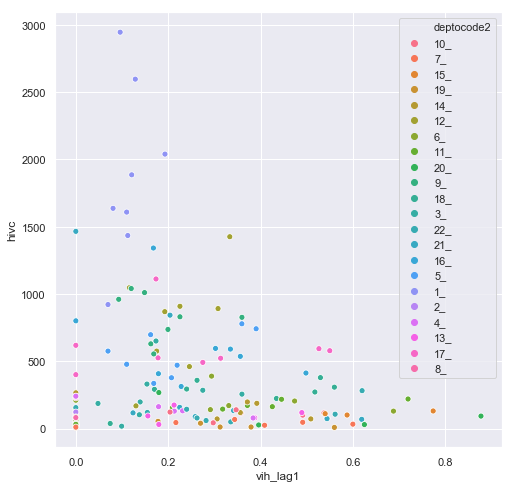

In [271]:
plt.rcParams["figure.figsize"] = (8,8)
sns.scatterplot("vih_lag1", "hivc", hue = "deptocode2", 
           data = sigsagt.assign(hivc=lambda x: (x.hivc)))

(0, 10)

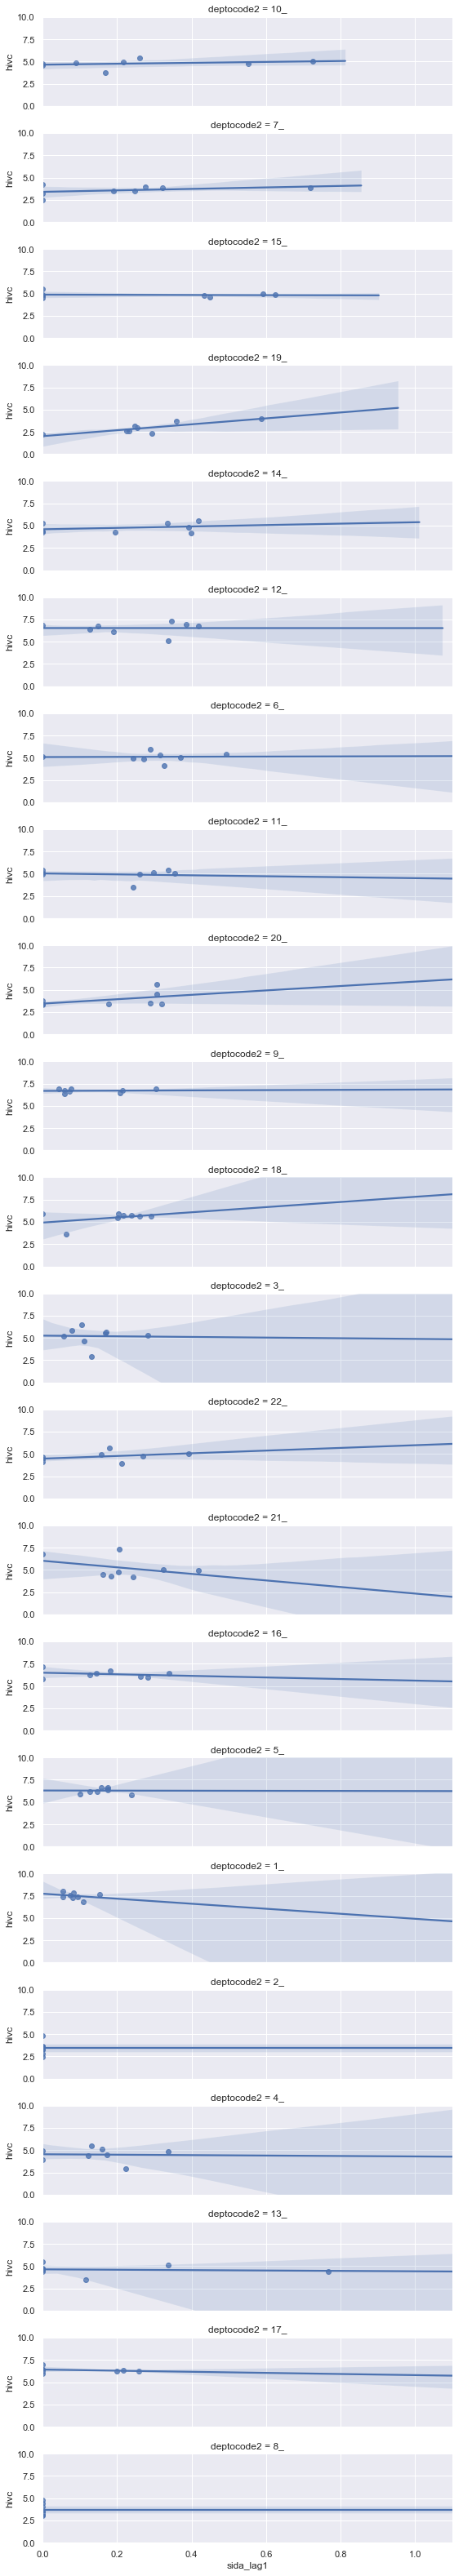

In [272]:
sns.lmplot("sida_lag1", "hivc", row = "deptocode2", fit_reg=True,
           data = sigsagt.assign(hivc=lambda x: np.log1p(x.hivc)),
           aspect=4, height=2)
plt.xlim(0,1.10)
plt.ylim(0,10)

In [217]:
sigsagt.head()

,Año,Mes,deptocode,sida_lag1,Residencia Actual-Depto,hivc,vih_lag1,hivc_lag1,deptocode2
0,2017,3,15,0.5600,BAJA VERAPAZ,198,0.0000,294,15_
1,2017,3,12,0.3248,SAN MARCOS,786,0.2496,785,12_
2,2017,3,6,0.3136,SANTA ROSA,88,0.6400,517,6_
3,2017,3,7,0.3136,SOLOLA,60,0.0000,49,7_
4,2017,3,17,0.2632,EL PETEN,331,0.5504,687,17_


In [219]:
sigsagt[(sigsagt.Año==2017) & (sigsagt.deptocode == 8)]

,Año,Mes,deptocode,sida_lag1,Residencia Actual-Depto,hivc,vih_lag1,hivc_lag1,deptocode2
21,2017,3,8,0.0,TOTONICAPAN,68,0.0,33,8_
43,2017,4,8,0.0,TOTONICAPAN,23,0.0,68,8_
65,2017,5,8,0.0,TOTONICAPAN,32,0.0,23,8_
86,2017,6,8,0.0,TOTONICAPAN,22,0.0,32,8_
104,2017,7,8,0.0,TOTONICAPAN,31,0.0,22,8_
131,2017,8,8,0.0,TOTONICAPAN,55,0.0,31,8_
153,2017,9,8,0.0,TOTONICAPAN,27,0.0,55,8_
175,2017,10,8,0.0,TOTONICAPAN,20,0.0,27,8_
197,2017,11,8,0.0,TOTONICAPAN,117,0.0,20,8_
219,2017,12,8,0.0,TOTONICAPAN,82,0.0,117,8_


In [220]:
gtrends[gtrends.deptocode == 8]

,depto,gtrend,filename,Año,Mes_orig,Term,deptocode
21,Totonicapán Department,NaN,GTrends-2017-01-SIDA.csv,2017,1,SIDA,8
21,Totonicapán Department,NaN,GTrends-2017-01-VIH.csv,2017,1,VIH,8
21,Totonicapán Department,NaN,GTrends-2017-02-SIDA.csv,2017,2,SIDA,8
20,Totonicapán Department,NaN,GTrends-2017-02-VIH.csv,2017,2,VIH,8
21,Totonicapán Department,NaN,GTrends-2017-03-SIDA.csv,2017,3,SIDA,8
21,Totonicapán Department,NaN,GTrends-2017-03-VIH.csv,2017,3,VIH,8
21,Totonicapán Department,NaN,GTrends-2017-04-SIDA.csv,2017,4,SIDA,8
21,Totonicapán Department,NaN,GTrends-2017-04-VIH.csv,2017,4,VIH,8
20,Totonicapán Department,NaN,GTrends-2017-05-SIDA.csv,2017,5,SIDA,8
20,Totonicapán Department,NaN,GTrends-2017-05-VIH.csv,2017,5,VIH,8
